# Group information

Names: Giovane Oliveira de Carvalho RA:173146

Francisco Eduardo Pereira Sousa Silva RA: 174292

Pedro Benetton RA: 185566

# **Machine Learning MC886/MO444 - Task \#2**: Model Selection for classification


### Objective:

To explore **Model Selection** techniques to select the best model and hyperparameters for a classification task.

#### **Dataset: Online Shoppers Purchasing Intention**

The dataset contains sessions of access to a website. Each user can have only one record for each year, in the case were the users were repeated.

Our classification objective is to determine when a given session will end with the user purchasing something.
This information is present in the "Revenue" column, which is our target.

Features and the corresponding descriptions:

- **Administrative**: Amount of times the user visited this type of page.
- **Administrative_Duration**: Time spent by the user visiting this type of page.
- **Informational**:  Amount of times the user visited this type of page.
- **Informational_Duration**: Time spent by the user visiting this type of page.
- **ProductRelated**:  Amount of times the user visited this type of page.
- **ProductRelated_Duration**: Time spent by the user visiting this type of page.
- **BounceRates**: The bounce rate is the percentage of visitors who enter the site from that page and then leave without triggering any other analytics action. This field contains the average bounce rate of the pages visited.
- **ExitRates**: The Exit rate is the percentage of visitors that exited the site on a specific page. This field contains the average bounce rate of the pages visited.
- **PageValues**: The page value is calculated by google analytics based on the values spent after visiting this page. This field contains the average page values of the pages visited.
- **SpecialDay**: The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
- **Month**: Month of the visit.
- **OperatingSystems**: The operating system used by the visitor. This field is coded as integer categories.
- **Browser**: The browser used by the visitor. This field is coded as integer categories.
- **Region**: The region where the user visited the site. This field is coded as integer categories.
- **TrafficType**: Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct). This field is coded as integer categories.
- **VisitorType**: Visitor type as "New Visitor", "Returning Visitor", and "Other"
- **Weekend**: Boolean value indicating whether the date of the visit is a weekend day.
- **Revenue**: The target value, indicating where the visitor bought something (1) or did not bought anything (0).


**How to load the dataset**

Dataset folder link: [here](https://drive.google.com/drive/folders/14uiy_7xMq5LOqODBzbIJLD4Vq0E9XD5v?usp=sharing)

You should open the google drive folder, click on the name of the folder on the top and click on "organize" => "add shortcut".<br/>
Then you should choose where to add the shortcut. The recommendation is to add on "MyDrive", so you don't need to change the dataset path used below.

Then you should run the cell below and authorize google drive access.

This is the same folder as in the previous task, you can check your google drive to be sure if you need to copy it again.

*If you want to run the notebook locally, just download the folder and change the path below to the location of the folder in your local environment.*

In [ ]:
# link with google drive
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive', force_remount=True)

# load dataset from google drive
path = "gdrive/MyDrive/MC886 - Datasets/" + "online_shoppers_intention_mod.csv" # Change this to be the correct path if you added the dataset in a different location
df = pd.read_csv(path)

Mounted at /content/gdrive


### **Data analysis and preprocessing** (1.5 points)

In this section, you should explore the dataset. Remember to avoid using data that you should not have in training.

You can plot graphs with features that you think are important to visualize the relation with the target(`Revenue`). You can also use boxplot graphs to understand feature distributions. There are no minimal/maximum requirements in what graphs you should use, explore just what you think can help in understanding the dataset.

As in the previous task, preprocess the data, transform the categorical features with OneHotEncoding, and remember to scale continuous features to be in a similar scale between each other.


In [ ]:
## Visualize the data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, balanced_accuracy_score, ConfusionMatrixDisplay, f1_score, recall_score, precision_score

Olhando as 5 primeiras linhas do Dataset inteiro

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0


Fazendo a verificação de valores nulos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Felizmente, não temos valores nulos desta vez.

#### **Avaliação de Colunas e suas categorias.**

Algumas colunas podem parecem númericas a primeira vista, mas na verdade elas são categóricas. Trata-las como númericas pode causar a interpretação de ordem que não existe, então vamos fazer a traformação de tipo. São elas:

- OperatingSystems
- Browser
- Region
- TrafficType

In [ ]:
df = df.astype({'OperatingSystems': 'str',
                'Browser'         : 'str',
                'Region'          : 'str',
                'TrafficType'     : 'str'})

Vamos fazer a separação das bases de treino e teste antes da EDA.

Por enquanto a variável alvo ficará dentro dos vetores X, simplismente pela facilidade de análise. Posteriormente faremos a retirada delas.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df, df['Revenue'], random_state = 77)

Filtrando apenas as colunas númericas do dataset

In [ ]:
colunas_numericas = x_train.select_dtypes(include= np.number).columns.drop('Revenue')
colunas_numericas

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')

Utilizando o método describe para termos um resumo de estatísticas sobre cada uma das colunas de interesse.

In [ ]:
x_train.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
count,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000,9247.000000
mean,2.343679,80.718012,0.505245,35.251683,31.967449,1202.791470,0.021867,0.042575,5.973283,0.061079,0.155402
std,3.348168,174.136465,1.260109,143.276691,44.884090,1945.516859,0.047918,0.048145,18.771629,0.198606,0.362307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,188.350000,0.000000,0.014078,0.000000,0.000000,0.000000
50%,1.000000,9.166667,0.000000,0.000000,18.000000,610.000000,0.003125,0.025000,0.000000,0.000000,0.000000
75%,4.000000,92.000000,0.000000,0.000000,38.000000,1476.160714,0.016667,0.050000,0.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,1.000000


In [ ]:
x_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8457,0,0.000000,0,0.000,12,329.214286,0.016667,0.028704,0.000000,0.0,Nov,3,2,1,2,Returning_Visitor,False,0
3731,0,0.000000,1,55.000,38,1377.409524,0.000877,0.018860,0.000000,0.0,May,2,2,2,4,Returning_Visitor,False,0
4780,2,48.833333,6,370.875,22,526.028138,0.032143,0.032738,22.935311,0.6,May,1,1,1,2,Returning_Visitor,False,0
7412,4,52.500000,0,0.000,12,234.400000,0.000000,0.013333,0.000000,0.0,Oct,2,2,1,2,New_Visitor,False,0
9051,0,0.000000,0,0.000,5,975.500000,0.080000,0.100000,0.000000,0.0,Nov,3,2,3,13,Returning_Visitor,False,0


Estamos trabalhando com um problema de classificação binário.

Podemos recomendar para a análise das variáveis númericas a comparação de histogramas entre as classes 0 e 1 para cada variável. Outra possível alternativa seria a construção de um boxplot para comparar ambas as classes.

Para o estudo em questão, vamos escolher o boxplot para coparar os labels 0 e 1.

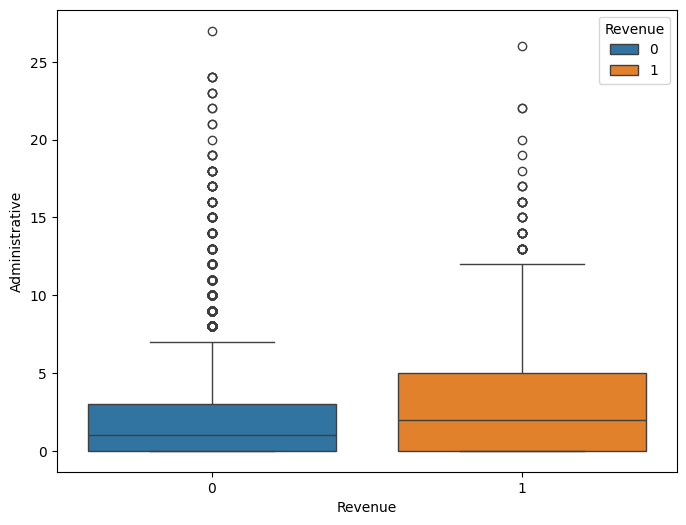

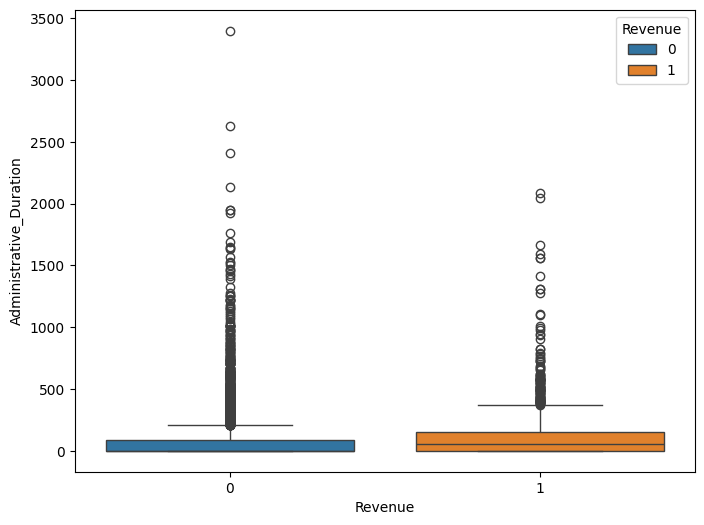

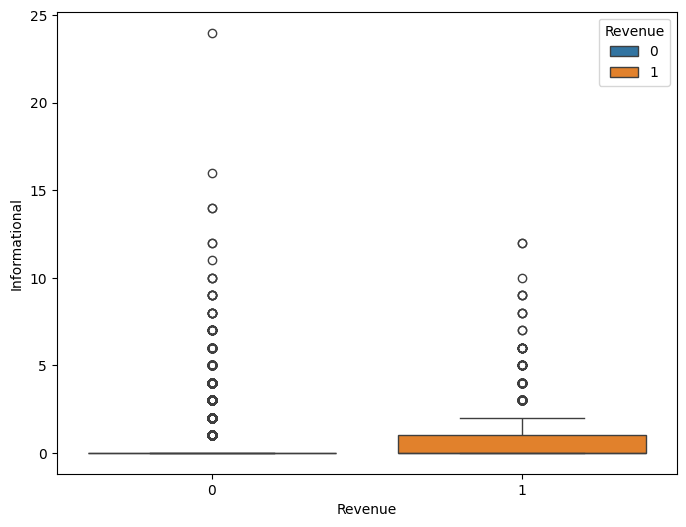

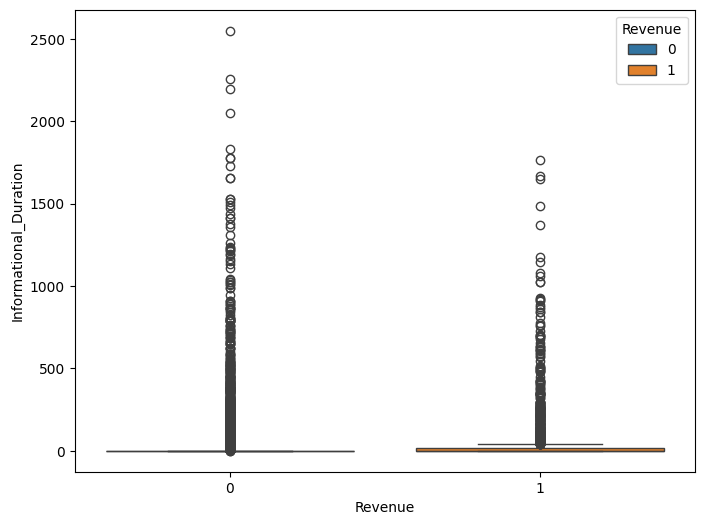

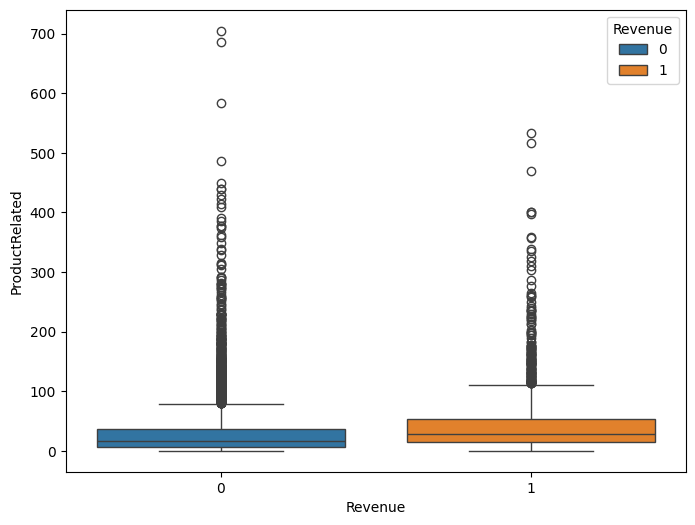

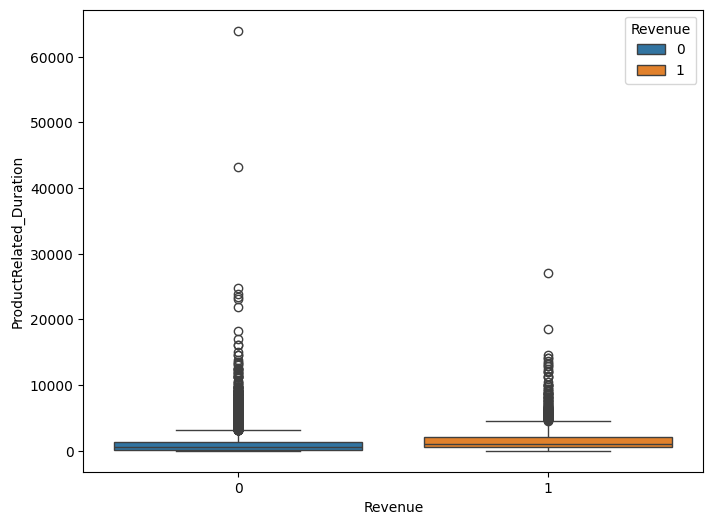

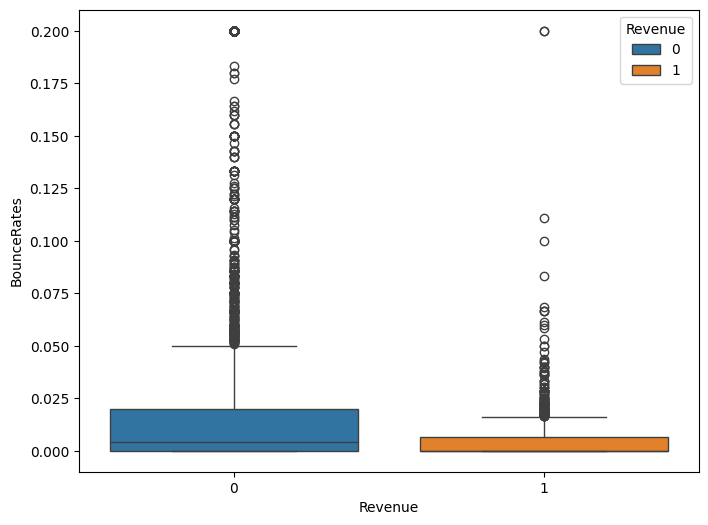

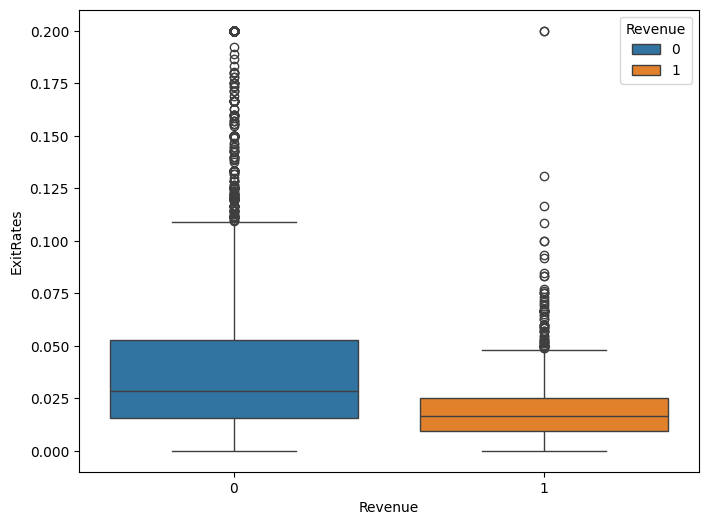

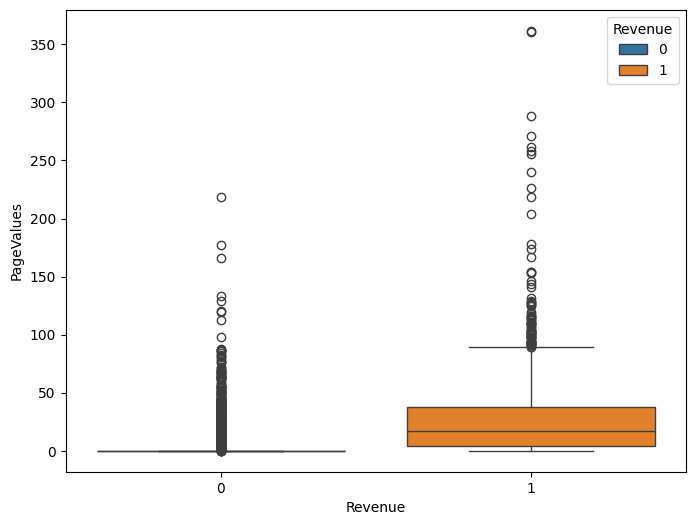

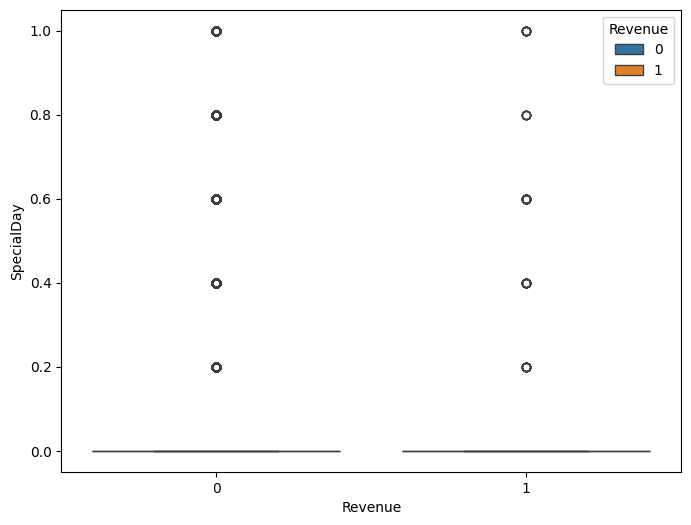

In [ ]:
for i in colunas_numericas:
  plt.figure(figsize = (8,6))
  sns.boxplot(data = x_train, y = i, x = y_train, hue = y_train)
  plt.show()
  print('\n')

A primeira análise que podemos tirar é que muitas distribuições aparentam ter muitos outliers.

Apesar de muitas features terem distribuições parecidas, algumas são consideravelmente diferentes. Destaca-se ExitRates, PageValues e BounceRates. Provavelmente elas terão certa influência sobre a variável a ser predita.

Partimos para a análise de colunas categóricas agora.

In [ ]:
colunas_categoricas = x_train.columns.drop(colunas_numericas)
colunas_categoricas

Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

Para as variáveis preditoras categoricas vamos fazer um estudo da contagem de valores para cada label.

Para isso podemos usar o countplot.

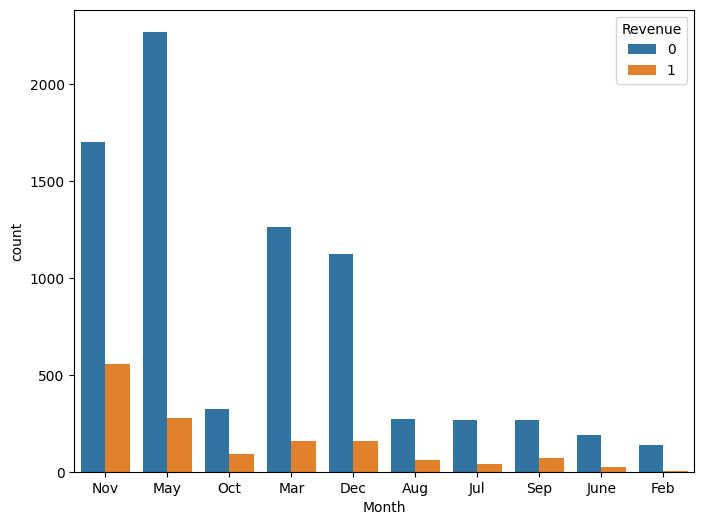

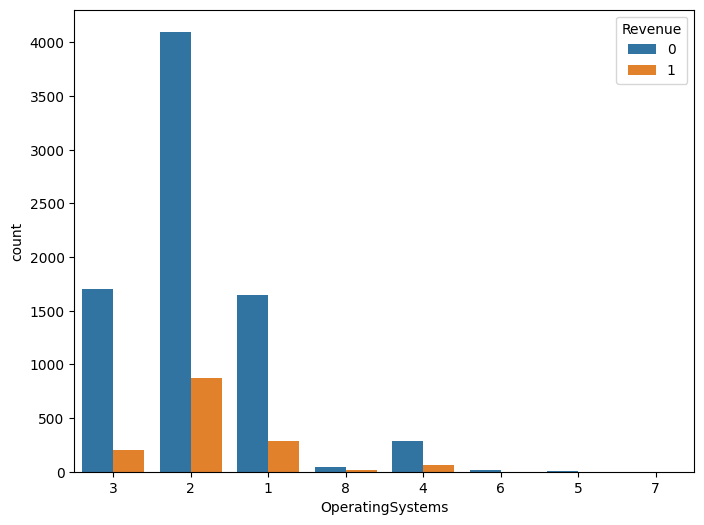

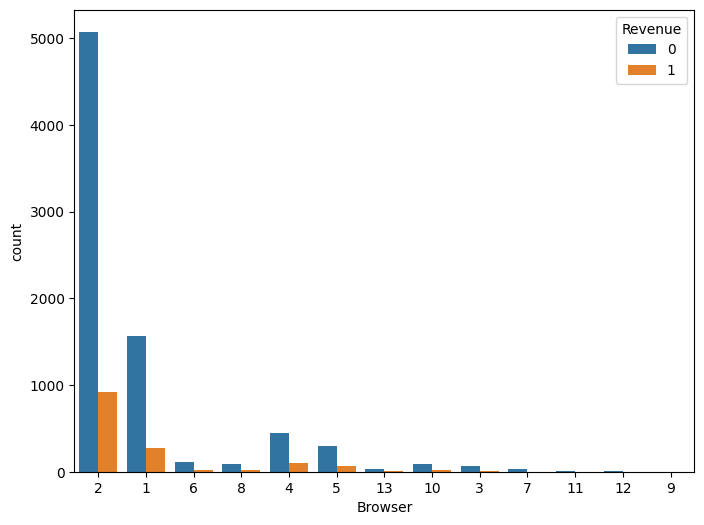

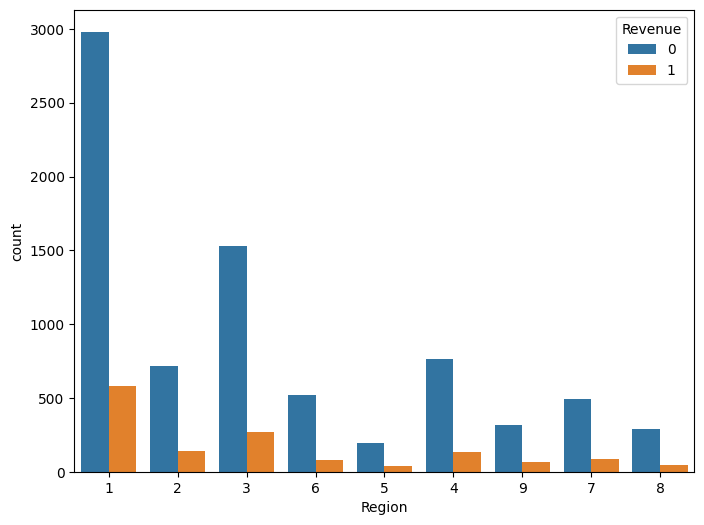

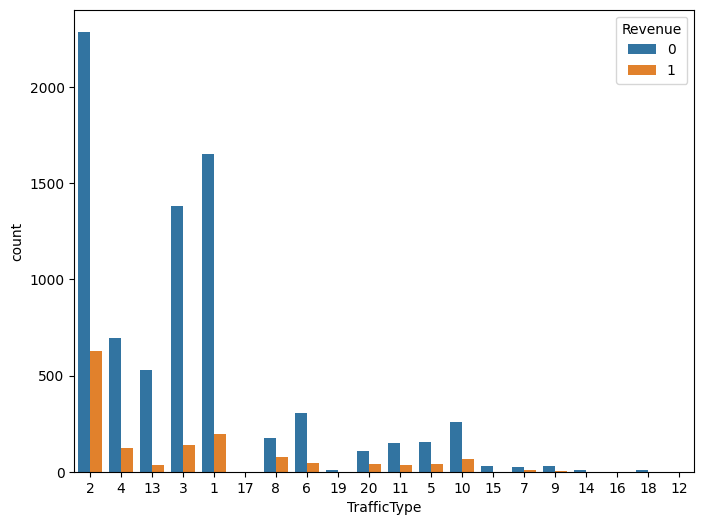

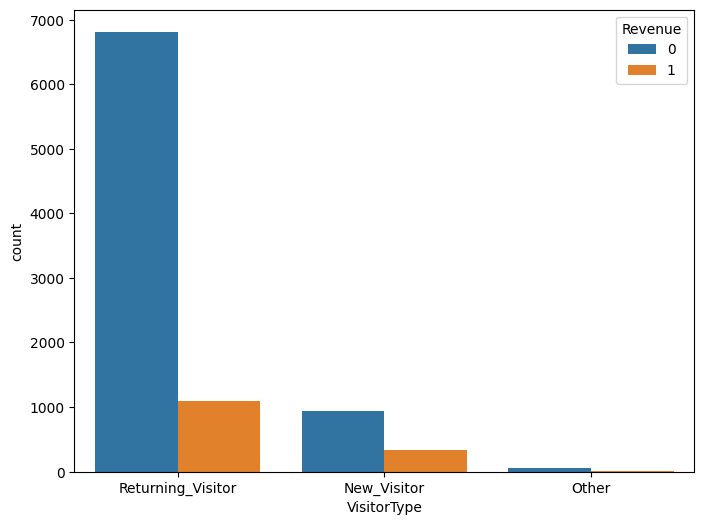

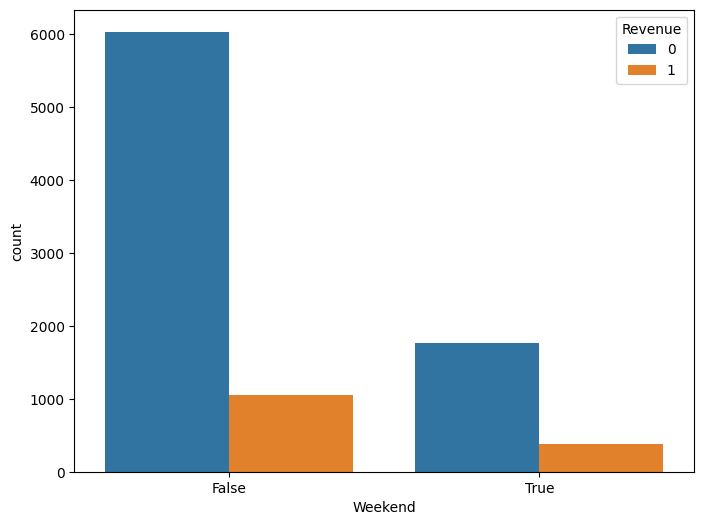

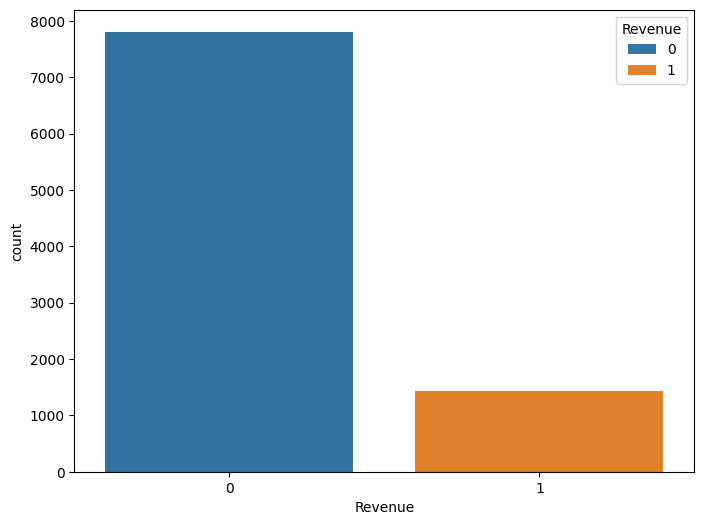

In [ ]:
for i in colunas_categoricas:
  plt.figure(figsize = (8,6))
  sns.countplot(data = x_train, x = i, hue = y_train)
  plt.show()
  print('\n')

Olhando assim ainda é dificil indicar quais variáveis categoricas tem forte efeito sobre a variável predita.

Vamos seguir para um gráfico de correlação entre as variaveis numéricas.

In [ ]:
df_corr = df[colunas_numericas].corr()
df_corr

matrix = np.triu(df_corr)
np.fill_diagonal(matrix, False)

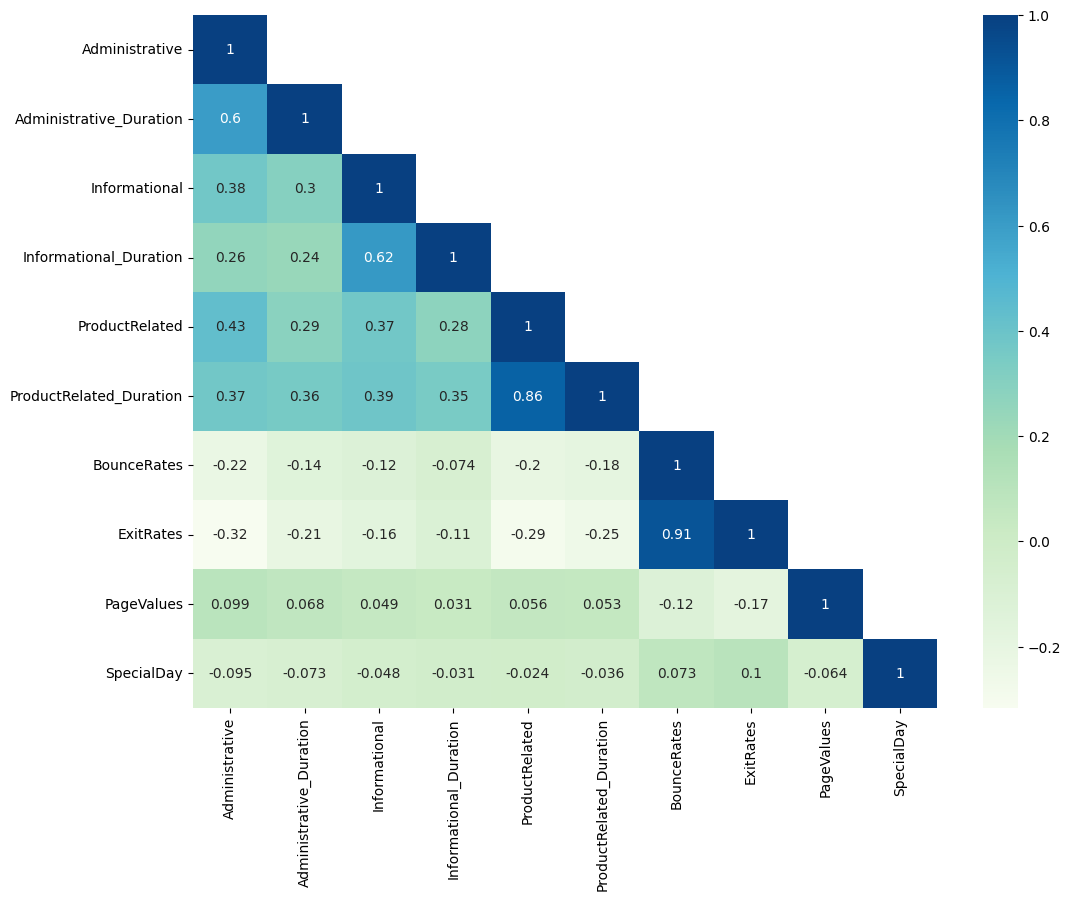

In [ ]:
plt.figure(figsize = (12,9))

sns.heatmap(df_corr, cmap = 'GnBu', annot=True, mask=matrix)

plt.show()

Algumas variáveis continuas estão bem correlacionadas!

Exit Rates e BounceRates tem correlação de 0.91, o que confirma o porque ambas tem forte influência no gráfico de boxplot.

Seguiremos com todas as variáveis por enquanto.

Faremos agora o Scaling das variáveis continuas.

Posteriormente faremos o One-Hot-Encoding das variáveis continuas.

In [ ]:
x_train.drop('Revenue', axis = 1, inplace = True)
x_test.drop('Revenue', axis = 1, inplace = True)

colunas_categoricas = colunas_categoricas.drop('Revenue')

Scaler das variáveiss

In [ ]:
scaler = StandardScaler()

scaler.fit(x_train[colunas_numericas])

x_train[colunas_numericas] = scaler.transform(x_train[colunas_numericas])
x_test[colunas_numericas] = scaler.transform(x_test[colunas_numericas])

One-Hot-Enconding das variáveis categoricas.

In [ ]:
ONE = OneHotEncoder(sparse_output = False)
ONE.fit(x_train[colunas_categoricas])

# X_train
x_train_dummy = ONE.transform(x_train[colunas_categoricas])
x_train_dummy = pd.DataFrame(x_train_dummy, index = x_train.index, columns = list(ONE.get_feature_names_out()))
x_train = pd.concat([x_train.drop(colunas_categoricas, axis = 1), x_train_dummy], axis = 1)


# X_test
x_test_dummy = ONE.transform(x_test[colunas_categoricas])
x_test_dummy = pd.DataFrame(x_test_dummy, index = x_test.index,  columns = list(ONE.get_feature_names_out()))

x_test = pd.concat([x_test.drop(colunas_categoricas, axis = 1), x_test_dummy], axis = 1)

Observando a saida do dataset X_train

In [ ]:
x_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
8457,-0.700026,-0.463558,-0.400975,-0.246053,-0.444891,-0.449045,-0.108535,-0.288136,-0.318225,-0.307557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3731,-0.700026,-0.463558,0.392650,0.137841,0.134410,0.089759,-0.438066,-0.492616,-0.318225,-0.307557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4780,-0.102652,-0.183112,4.360774,2.342610,-0.222083,-0.347877,0.214457,-0.204334,0.903648,2.713663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7412,0.494721,-0.162054,-0.400975,-0.246053,-0.444891,-0.497782,-0.456373,-0.607408,-0.318225,-0.307557,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9051,-0.700026,-0.463558,-0.400975,-0.246053,-0.600857,-0.116835,1.213249,1.192825,-0.318225,-0.307557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


### **Metric selection** (0.5 point)

As we're working with unbalanced data, the accuracy metric is not a good indicator of performance. Choose a metric and explain why that metric is a good fit for the online shopping intention problem. You don't need to implement the metric, only discuss it.

*Tip: Some common metrics are [balanced accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html), [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [f1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) and [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)*.

In [ ]:
y_train.value_counts()

Revenue
0    7810
1    1437
Name: count, dtype: int64

Por se tratar de um problema desbalanceado precisamos escolher uma melhor métrica que atenda aos interesses de negócio. No caso, queremos acertar quando uma transação acontece ou não.

Aqui temos algumas possibilidades, sendo elas:

**Recall**: É a taxa de casos positivos que o modelo conseguiu capturar, sendo representado por

**TP/(TP + FN)**

**Precisão**: É a taxa de TP dentro da previsão do modelo, representado por

**TP/(TP + FP)**

**F1-score**: O F1 score tenta fazer um balanço entre as duas métricas acima! Ele é a média harmônica da precisão e recall, dado por:

 **2 * precisão * revocação / (precisão + revocação)**

 Como nosso interesse é o caso positivo, seria importante que tanto o recall quanto a precisão fossem **alta**. Pelo **F1-score** ser uma média harmônica dos dois, **vamos o escolher como a métrica** desse caso!

 Seria interessante também testar o F-Beta Score, para admitir pesos sobre a média harmônica, dando mais peso a revocação ou precisão a depender do interesse específico.

### **Feature selection** (2 points)

As seen in class, there are different ways to select which features to use in a machine learning model.

You should implement the "Forward stepwise selection" technique to find the best `p` features to be used in this task according to that method.

Use the [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model and the **K-fold cross-validation** as optimality criterion. You can use the Scikit-learn library, which has helper functions to create the [K-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) logic and the model. The metric used in K-fold should be the one chosen in the previous section!

Remember to save a new dataframe only with the selected features for the next steps! Also, use only training data on K-fold validation, keeping a test set separated to estimate the performance of the model on unseen data on the final part of the whole task.

Fazendo a divisão do 5 folds que servirão de base para o treino e validação.

In [ ]:
kf = KFold(random_state=77, shuffle=True)

params = {}

for i, (train_index, test_index) in enumerate(kf.split(x_train)):
  params[i] = (train_index, test_index)

Aqui implementamos um Foward Selection com o conceito de K-Fold.

Os resultados são armazenados em um dicionário chamado FSS.

Por ser um pouco demorado, salvei o resultado do dicionário com os melhores modelos em cada valor de p variáveis junto com o valor da média da métrica de validação dos k-folds envolvidos.

In [ ]:
FSS = {}

ps = x_train.columns


for z in range(len(ps)):
  f1_score_base = 0

  if z > 0:
    subset = FSS[z-1][0]
    if z > 1:
      subset = subset[0]
      print(FSS[z-1])
      print('---------------------------------')
    ps = ps.drop(subset[-1])

  for i, p in enumerate(ps):

    if z > 0:
      predictors = subset.copy()
      predictors.append(p)

    else:
      predictors = p


    f1_score_k_fold = []

    for k in params:
      x_train_k_fold = x_train.iloc[params[k][0]][predictors]
      y_train_k_fold = y_train.iloc[params[k][0]]

      x_test_k_fold  = x_train.iloc[params[k][1]][predictors]
      y_test_k_fold  = y_train.iloc[params[k][1]]



      x_train_parcial = pd.DataFrame(x_train_k_fold)
      LG = LogisticRegression(max_iter = 300)
      LG.fit(x_train_parcial, y_train_k_fold)

      y_pred = LG.predict(pd.DataFrame(x_test_k_fold))
      f1_score_pred = f1_score(y_test_k_fold, y_pred)
      f1_score_k_fold.append(f1_score_pred)

      del LG


    f1_score_pred = mean(f1_score_k_fold)
    # print(f1_score_base,f1_score_pred)

    if f1_score_pred > f1_score_base:

      f1_score_base = f1_score_pred
      FSS[z] = ([predictors], f1_score_base)


([['PageValues', 'VisitorType_New_Visitor']], 0.48856744878873365)
---------------------------------
([['PageValues', 'VisitorType_New_Visitor', 'ExitRates']], 0.4931016268390227)
---------------------------------
([['PageValues', 'VisitorType_New_Visitor', 'ExitRates', 'Month_Nov']], 0.4984309125272601)
---------------------------------
([['PageValues', 'VisitorType_New_Visitor', 'ExitRates', 'Month_Nov', 'OperatingSystems_2']], 0.5065071221279435)
---------------------------------
([['PageValues', 'VisitorType_New_Visitor', 'ExitRates', 'Month_Nov', 'OperatingSystems_2', 'Informational_Duration']], 0.5076211627703152)
---------------------------------
([['PageValues', 'VisitorType_New_Visitor', 'ExitRates', 'Month_Nov', 'OperatingSystems_2', 'Informational_Duration', 'Region_2']], 0.5088638059355106)
---------------------------------
([['PageValues', 'VisitorType_New_Visitor', 'ExitRates', 'Month_Nov', 'OperatingSystems_2', 'Informational_Duration', 'Region_2', 'Month_Feb']], 0.51044

In [ ]:
FSS_dataframe = pd.DataFrame(FSS.values(), columns = ['Predictors', 'f1-score'] )

Salvando as informações do Foward Selection

In [ ]:
import pickle
FSS_dataframe.to_pickle('FSS.pickle')

NameError: name 'FSS_dataframe' is not defined

In [ ]:
df_model = pd.read_pickle('FSS.pickle')

In [ ]:
df_model.columns = ['Predictors', 'f1-score']

In [ ]:
results = df_model
df_model.to_pickle('FSS.pickle')

Avaliando a quantidade de preditores versus o valor da métrica de interesse, o f1-score.

<Axes: >

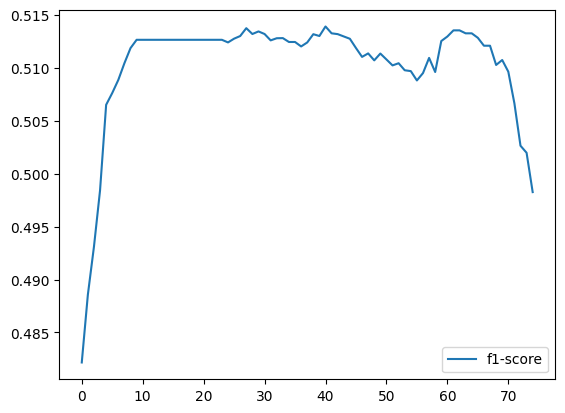

In [ ]:
results.plot()

Vendo os 5 melhores modelos

In [ ]:
results.reset_index().sort_values(['f1-score', 'index'], ascending = [False, True]).head()

,index,Predictors,f1-score
40,40,"[[PageValues, VisitorType_New_Visitor, ExitRat...",0.513909
27,27,"[[PageValues, VisitorType_New_Visitor, ExitRat...",0.513748
61,61,"[[PageValues, VisitorType_New_Visitor, ExitRat...",0.513541
62,62,"[[PageValues, VisitorType_New_Visitor, ExitRat...",0.513541
29,29,"[[PageValues, VisitorType_New_Visitor, ExitRat...",0.513441


Olhando exclusivamente o valor da métrica f1-score, o modelo selecionado foi o de 40 preditores.

Apesar disso, modelos menores também apresentaram f1-score bem próximos!

In [ ]:
preditores_interesse = results['Predictors'][40][0]

### **Model selection** (4 points)

This is the main section of the task. Using the features selected in the previous section, you should do a [**Grid search** with K-fold cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to select the best classification model and its hyperparameters for this task. You can do it by hand if you want (you will need to do a nested loop for each tested parameter to have all combinations).

Remember to use only training data on K-fold validation, keeping a test set separated to estimate the performance of the model on unseen data.

You should train and validate the following models:
- [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Ridge Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html)
- [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

As the Lasso model do not predict classes, you would need to convert the results to classes, and execute a GridSearch by hand. Alternatively, you can use only the Logistic regression model and test the regularization parameters ('l1' for Lasso regularization and 'l2' for Ridge) and show the best hyperparemeters when using each regularization. Remember to change the "C" parameter (the smaller the C, the stronger is the regularization).

Explore the documentation above and select which hyperparameters to vary, besides the regularization ones.

Also, you should test the polynomial transformation to find possible nonlinear relations between the features of the dataset. **Do not** use values above "3" for the `degree` of the polynomial transformation, as the number of features increases exponentially.

In short, you should use GridSearchCV (that uses K-fold internally) to get the best hyperparameters for the model using different regularization parameters, while also testing the polynomial transformation.

*Note: you will need to use the `fit` method more than once to test the different dataset transformations. Choose wisely which hyperparameters to test, as the GridSearch will test all combinations and can take very a long time to finish.*

Como dito no problema, é preciso testar a regressão Logistica primeiramente e posteriormente aplicar as normas L1 e L2, equivalentes a Regularização Lasso e Ridge.

Como temos ambas as normas L1 e L2 como hiperparametros da regressão logistica vamos passar eles dentro de um dicionário para a busca no GridSearch. Assim fazemos tudo de uma única vez. Também passamos o valor de C, avaliando a "força" de regularização. Por fim, além disso, colocamos o hiperparametro class_wight, que pode ter um grande efeito, visto que é um problema desbalanceado.

Fazemos essa busca de hiperparametros 2 vezes!

- Para o modelo com as variáveis selecionados acima, as 40 features
- Para o modelo com as váriaveis selecionadas acima e as combinações polinomias, para achar relações não lineares.

In [ ]:
Grid = {'penalty': ['l1', 'l2', None],
        'C': [0.01, 0.1, 1, 10, 20],
        'class_weight': [None, 'balanced']}

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

In [ ]:
# Testando o grid Search para o modelo Logistic Regression sem features polinomias
LG = LogisticRegression(max_iter = 500, solver = 'saga' )

gd = GridSearchCV(LG, Grid, n_jobs = -1, scoring = 'f1')

gd.fit(x_train[preditores_interesse], y_train)

Avaliando a melhor métrica para o melhor modelo com os testes da Regressão sem regularização, L1 e L2:

In [ ]:
print(f'O melhor modelo durante o treinamento para a Regressão Logistica foi {gd.best_estimator_}')
print(f'O melhor f1-score durante o treinamento para a Regressão Logistica foi {gd.best_score_}')

Fazendo a criação dos modelos polinomias!

In [ ]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(x_train[preditores_interesse])

In [ ]:
X_train_poly.shape

(9247, 903)

O dataset fica enorme, com mais de 900 colunas, pois ele considera todas as possíveis interações entre features.

In [ ]:
# Testando o grid Search para o modelo Logistic Regression para com features Polinomiais
LG = LogisticRegression(max_iter = 500, solver = 'saga' )

gd_poly = GridSearchCV(LG, Grid, n_jobs = -1, scoring = 'f1')

gd_poly.fit(X_train_poly, y_train)

In [ ]:
print(f'O melhor modelo durante o treinamento para a Regressão Logistica com features polinomiais foi {gd_poly.best_estimator_}')
print(f'O melhor f1-score durante o treinamento para a Regressão Logistica com features polinomiais foi {gd_poly.best_score_}')

O melhor modelo foi salvo em um arquivo pkl. Isso pois o GridSearch polinomial demora muito para ser executado.

In [ ]:
with open('grid_search_polinomial.pkl','wb') as f:
    pickle.dump(gd_poly,f)

#### Discussion of key points

- What was the best model hyperparemeters, according to cross validation?
- The models that use regularization were able to outperform the Logistic Regression without it? Explain why.

O melhor modelo foi o da regressão logística, com a norma **L1** aplicada e parâmetro de **regularização 0.01**, **balanceamento entre classes** do modelo polinomial.

Sim, o melhor modelo e o escolhido possui regularização. Muito provavelmente isso advem do fato de que em um modelo sem regularização todos os preditores tem valor B associado e embora isso possa gerar bons resultados na base de treino, pode ser péssimo na validação, pois não generaliza bem.

Considerando que para a regressão polinomial o número de features passa de 900, o impacto pode ser ainda muito maior. Por isso, regularizar os parametros da função logistica é de extrema importância neste caso.

Ainda mais, nesse caso, falando de + 900 features, a regressão de Lasso pode ser dita como a mais impactante pois consegue zerar os termos considerados desnecessários, funcionando como um feature selection.

Essa mistura de regularização de parametros, evitando overfitting, com o fator de feature selection da norma L1 ajudaram a atingir melhores resultados na regressão logistica com regularização contra a sem regularização.

### Threshold testing (1 point)

The three models trained in the previous session can return the probabilities of a sample being of the positive class.
The default threshold used to convert the results to the desired 0 or 1 output is `0.5`.

Use the K-fold cross validation to test different thresholds with the best models trained in the previous section (remember to train the best models with all train data and the best hyperparameters).

*If the model does not output probabilities, look for the `predic_proba` method*.

In [ ]:
with open("grid_search_polinomial.pkl", "rb") as f:
    gd_poly = pickle.load(f)

Vamos agora testar como diferentes thresholds afetam nossa métrica f1-score para o melhor modelo escolhido acima.

In [ ]:
gd_poly.best_params_

{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1'}

Usando a separação K-fold.

In [ ]:
kf = KFold(random_state=77, shuffle=True)

params = {}

for i, (train_index, test_index) in enumerate(kf.split(X_train_poly)):
  params[i] = (train_index, test_index)

Criando um vetor de thresholds.

In [ ]:
np.linspace(0.1, 0.9, num=41)

array([0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 ,
       0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44, 0.46, 0.48, 0.5 , 0.52,
       0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66, 0.68, 0.7 , 0.72, 0.74,
       0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 ])

In [ ]:
CV_thresholds = {}

for thresholds in (np.linspace(0.1, 0.9, num=41)):
  CV_thresholds[thresholds] = []

for k in params:
    x_train_k_fold = pd.DataFrame(X_train_poly).iloc[params[k][0]]
    y_train_k_fold = y_train.iloc[params[k][0]]

    x_test_k_fold  = pd.DataFrame(X_train_poly).iloc[params[k][1]]
    y_test_k_fold  = y_train.iloc[params[k][1]]

    best_model = LogisticRegression(**gd_poly.best_params_, solver = 'saga', max_iter = 500, n_jobs = -1 )
    best_model.fit(x_train_k_fold, y_train_k_fold)

    y_proba_k_fold = best_model.predict_proba(x_test_k_fold)
    for thresholds in (np.linspace(0.1, 0.9, num=41)):
      f1_score_thresholds = []
      y_pred_k_fold = np.where(y_proba_k_fold[:, 1] > thresholds, 1, 0)

      f1_score_pred = f1_score(y_pred_k_fold, y_test_k_fold)
      CV_thresholds[thresholds].append(f1_score_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
media_valores = []
for thresholds in CV_thresholds:
  print(f'O valor do f1-score para o caso do {round(thresholds,4)} é avaliando a média dos K-folds foi de: {round(mean(CV_thresholds[thresholds]),4)}')
  media_valores.append(round(mean(CV_thresholds[thresholds]),4))

O valor do f1-score para o caso do 0.1 é avaliando a média dos K-folds foi de: 0.2859
O valor do f1-score para o caso do 0.12 é avaliando a média dos K-folds foi de: 0.2877
O valor do f1-score para o caso do 0.14 é avaliando a média dos K-folds foi de: 0.2896
O valor do f1-score para o caso do 0.16 é avaliando a média dos K-folds foi de: 0.2954
O valor do f1-score para o caso do 0.18 é avaliando a média dos K-folds foi de: 0.2987
O valor do f1-score para o caso do 0.2 é avaliando a média dos K-folds foi de: 0.3035
O valor do f1-score para o caso do 0.22 é avaliando a média dos K-folds foi de: 0.3127
O valor do f1-score para o caso do 0.24 é avaliando a média dos K-folds foi de: 0.3243
O valor do f1-score para o caso do 0.26 é avaliando a média dos K-folds foi de: 0.346
O valor do f1-score para o caso do 0.28 é avaliando a média dos K-folds foi de: 0.3869
O valor do f1-score para o caso do 0.3 é avaliando a média dos K-folds foi de: 0.4476
O valor do f1-score para o caso do 0.32 é avali

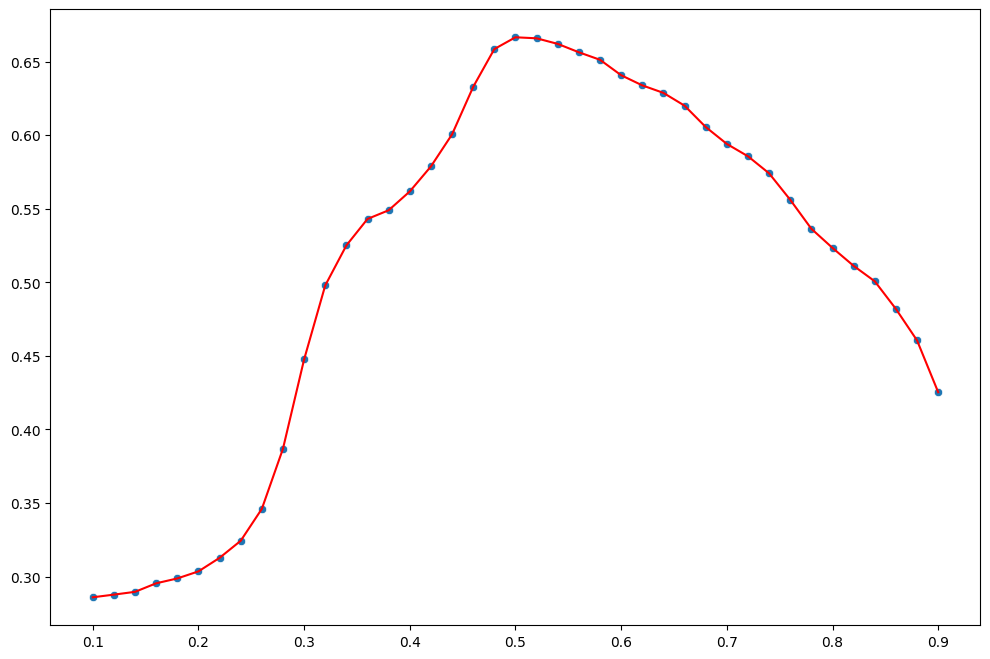

In [ ]:
plt.figure(figsize = (12,8))

sns.scatterplot(x = np.linspace(0.1, 0.9, num=41), y =  media_valores)

sns.lineplot(x = np.linspace(0.1, 0.9, num=41), y =  media_valores, c = 'r')

plt.show()

Testando também para os melhores hiperparâmetros dos modelos sem regularização e norma L2.

Vamos para isso escolher os melhores modelos em desempenho do GridSearch realizado.

In [ ]:
models = pd.DataFrame(gd_poly.cv_results_)

Parâmetros do melhor modelo sem regularização.




In [ ]:
gd_poly_no_regularization_params = models[models['param_penalty'].isna()].sort_values('mean_test_score', ascending = False).reset_index(drop=True)['params'].iloc[0]

Parâmetros do melhor modelo com regularização L2

In [ ]:
gd_poly_l2_params = models[models['param_penalty'] == 'l2'].sort_values('mean_test_score', ascending = False).reset_index(drop=True)['params'].iloc[0]

Testando o thresholds para o modelo sem regularização.

In [ ]:
CV_thresholds = {}

for thresholds in (np.linspace(0.1, 0.9, num=41)):
  CV_thresholds[thresholds] = []

for k in params:
    x_train_k_fold = pd.DataFrame(X_train_poly).iloc[params[k][0]]
    y_train_k_fold = y_train.iloc[params[k][0]]

    x_test_k_fold  = pd.DataFrame(X_train_poly).iloc[params[k][1]]
    y_test_k_fold  = y_train.iloc[params[k][1]]

    best_model = LogisticRegression(**gd_poly_no_regularization_params, solver = 'saga', max_iter = 500, n_jobs = -1 )
    best_model.fit(x_train_k_fold, y_train_k_fold)

    y_proba_k_fold = best_model.predict_proba(x_test_k_fold)
    for thresholds in (np.linspace(0.1, 0.9, num=41)):
      f1_score_thresholds = []
      y_pred_k_fold = np.where(y_proba_k_fold[:, 1] > thresholds, 1, 0)

      f1_score_pred = f1_score(y_pred_k_fold, y_test_k_fold)
      CV_thresholds[thresholds].append(f1_score_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

In [ ]:
media_valores = []
for thresholds in CV_thresholds:
  # print(f'O valor do f1-score para o caso do {round(thresholds,4)} é avaliando a média dos K-folds foi de: {round(mean(CV_thresholds[thresholds]),4)}')
  media_valores.append(round(mean(CV_thresholds[thresholds]),4))

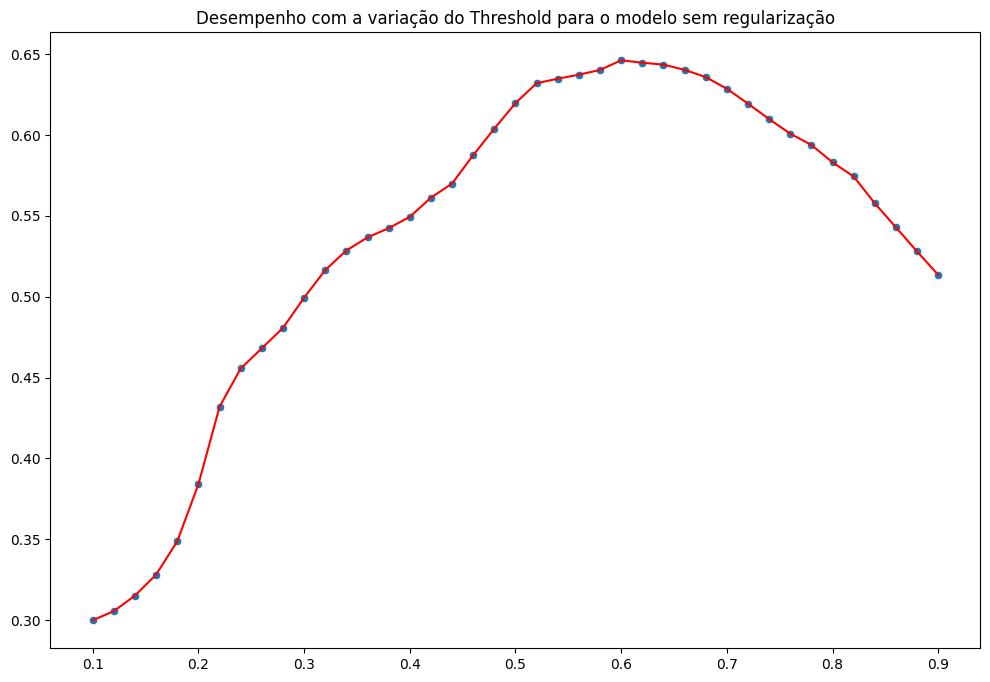

In [ ]:
plt.figure(figsize = (12,8))

sns.scatterplot(x = np.linspace(0.1, 0.9, num=41), y =  media_valores)

sns.lineplot(x = np.linspace(0.1, 0.9, num=41), y =  media_valores, c = 'r')

plt.title('Desempenho com a variação do Threshold para o modelo sem regularização')

plt.show()

Para o modelo sem regularização o valor do melhor threshold mudou um pouco, sendo mais próximo a 0.6.

O desempenho geral é levemente pior que o desempenho do modelo com regularização Lasso.

Testando o thresholds para o modelo com norma L2

In [ ]:
CV_thresholds = {}

for thresholds in (np.linspace(0.1, 0.9, num=41)):
  CV_thresholds[thresholds] = []

for k in params:
    x_train_k_fold = pd.DataFrame(X_train_poly).iloc[params[k][0]]
    y_train_k_fold = y_train.iloc[params[k][0]]

    x_test_k_fold  = pd.DataFrame(X_train_poly).iloc[params[k][1]]
    y_test_k_fold  = y_train.iloc[params[k][1]]

    best_model = LogisticRegression(**gd_poly_l2_params, solver = 'saga', max_iter = 500, n_jobs = -1 )
    best_model.fit(x_train_k_fold, y_train_k_fold)

    y_proba_k_fold = best_model.predict_proba(x_test_k_fold)
    for thresholds in (np.linspace(0.1, 0.9, num=41)):
      f1_score_thresholds = []
      y_pred_k_fold = np.where(y_proba_k_fold[:, 1] > thresholds, 1, 0)

      f1_score_pred = f1_score(y_pred_k_fold, y_test_k_fold)
      CV_thresholds[thresholds].append(f1_score_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
media_valores = []
for thresholds in CV_thresholds:
  # print(f'O valor do f1-score para o caso do {round(thresholds,4)} é avaliando a média dos K-folds foi de: {round(mean(CV_thresholds[thresholds]),4)}')
  media_valores.append(round(mean(CV_thresholds[thresholds]),4))

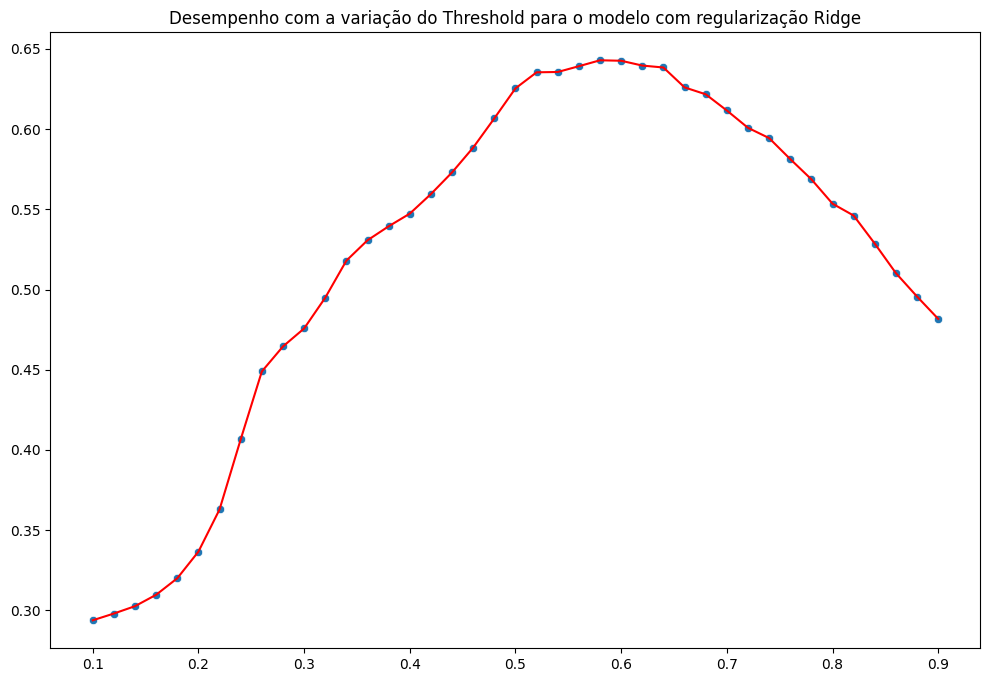

In [ ]:
plt.figure(figsize = (12,8))

sns.scatterplot(x = np.linspace(0.1, 0.9, num=41), y =  media_valores)

sns.lineplot(x = np.linspace(0.1, 0.9, num=41), y =  media_valores, c = 'r')

plt.title('Desempenho com a variação do Threshold para o modelo com regularização Ridge')

plt.show()

O gráfico é muito similar ao do modelo sem regularização!

Inclusive, indicando um valor de threshold bem próximo ao anterior.

Ainda sim, o desempenho foi inferior ao modelo com regularização Lasso.

Conclusão geral.

Podemos ver como a mudança do thresholds muda os valores de f1-score do modelo. A curva também muda a depender do modelo de regularização usado.

Como estamos avaliando o f1-score, mudanças para baixo ou para cima afetam diretamete os valores de Recall ou Precisão. Isso é um trade-off, quando aumentamos a precisão, a tendência é diminuir o recall e o contrário também é verdade.

Para o modelo de Lasso, o melhor valor parece girar em torno de 0.5. Já para os modelos sem regularização ou regularização de Ridge, os melhores resultados parecem girar em torno do threshold próximo de 0.6.

### Visualizing/interpreting weights (0.5 point)

As we're dealing with models that apply regularization terms, it's relatively easy to verify those results on the coefficient weights of the trained models.

Use the function below to visualize the weights of the final models.</br>
Also, train the three models again using *all* original features, and use the function below to compare how the weight distribution behaves on each of the models*.

\* *If no features were removed in previous sections, just compare the three models*

In [ ]:
best_model = LogisticRegression(**gd_poly.best_params_, solver = 'saga', max_iter = 500, n_jobs = -1 )
best_model.fit(pd.DataFrame(X_train_poly, columns = poly.get_feature_names_out()), y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.01, class_weight='balanced', max_iter=500, n_jobs=-1,
                   penalty='l1', solver='saga')

In [ ]:
## You don't need to change this cell!
import plotly.express as px

def plot_weights(clf, columns):
  '''
  Plot the weights of the model for each column in an interative graph.
  "model" should be an sklearn model or follow the same interface, having the "coef_" attribute with the weights.

  -----
  Examples:
  plot_weights(classifier, X.columns)
  # for polynomial transformations
  plot_weights(classifier, poly.get_feature_names_out(X.columns))

  '''
  if not hasattr(clf, 'coef_'):
    print("Invalid model!")
    return

  df_plot = pd.DataFrame(columns=['weight','columns'])
  df_plot['columns']= columns

  if len(columns) == len(clf.coef_):
    df_plot['weight']=clf.coef_
  else:
    df_plot['weight']=clf.coef_[0]

  fig = px.bar(df_plot, x='columns', y='weight', color='weight')
  fig.show()

In [ ]:
plot_weights(best_model, poly.get_feature_names_out())

O gráfico não ficou muito legal, pois muitos termos foram zerados devido a norma L1.

Vou fazer um filtro e plotar novamente para apenas os resultados das features com resultados diferentes de 0 serem mostrados.

In [ ]:
pesos = pd.DataFrame(best_model.coef_.reshape(-1), index = poly.get_feature_names_out(), columns=['Pesos'] )
fig = px.bar(pesos[pesos['Pesos'] != 0], y='Pesos', x= pesos.index[pesos['Pesos'] != 0], color='Pesos')
fig.show()

Treinando com o modelo polinomial e sem regularização, com os melhores parametros descobertos.

In [ ]:
best_model_no_reg = LogisticRegression(**gd_poly_no_regularization_params, solver = 'saga', max_iter = 500, n_jobs = -1 )
best_model_no_reg.fit(pd.DataFrame(X_train_poly, columns = poly.get_feature_names_out()), y_train)

pesos_modelo_no_reg = pd.DataFrame(best_model_no_reg.coef_.reshape(-1), index =poly.get_feature_names_out(), columns=['Pesos'] )
fig = px.bar(pesos_modelo_no_reg[pesos_modelo_no_reg['Pesos'] != 0], y='Pesos', x= pesos_modelo_no_reg.index[pesos_modelo_no_reg['Pesos'] != 0], color='Pesos')
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Treinando com o modelo polinomial e com regularização L2, com os melhores parametros descobertos.

In [ ]:
best_model_reg_l2 = LogisticRegression(**gd_poly_l2_params, solver = 'saga', max_iter = 500, n_jobs = -1 )
best_model_reg_l2.fit(pd.DataFrame(X_train_poly, columns = poly.get_feature_names_out()), y_train)

pesos_modelo_reg_l2 = pd.DataFrame(best_model_reg_l2.coef_.reshape(-1), index = poly.get_feature_names_out(), columns=['Pesos'] )
fig = px.bar(pesos_modelo_reg_l2[pesos_modelo_reg_l2['Pesos'] != 0], y='Pesos', x= pesos_modelo_reg_l2.index[pesos_modelo_reg_l2['Pesos'] != 0], color='Pesos')
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Treinando com as features originais, mas com os melhores hiperparametros descoberto.

In [ ]:
complete_model = LogisticRegression(**gd_poly.best_params_, solver = 'saga', max_iter = 500, n_jobs = -1 )
complete_model.fit(x_train, y_train)

pesos_modelo_completo = pd.DataFrame(complete_model.coef_.reshape(-1), index = x_train.columns, columns=['Pesos'] )
fig = px.bar(pesos_modelo_completo[pesos_modelo_completo['Pesos'] != 0], y='Pesos', x= pesos_modelo_completo.index[pesos_modelo_completo['Pesos'] != 0], color='Pesos')
fig.show()

#### Discussion of key points

- What conclusions can you have when looking at the different graphs?


Olhando ambos os gráficos podemos notar que o modelo dos parâmetros polinomiais tem mais features que o modelo com as features originais.

Também podemos notar a presença de colunas comuns a ambos os gráficos, como PageValues, ExitRates e Month_Nov.

Legal também perceber a presença de fatores de interação entre features, como PageValues _ OperationsSystems2, e polinomios, como Month_Nov2.

Isso possivelmente há não linearidades no modelo que puderam ser captadas com as fatures polinomias e de combinação.

Para os modelos polinomiais sem e com regressão de Ridge os parametros pareceram muito similares, mudando apenas um pouco de escala. Ainda, como eles não zeram os valores dos parametros, ficamos com uma quantidade gigante de features, então temos um grande número de preditores com parâmetros bem pequenos, enquanto outros "parecem" ser significativos (Muito embora vimos via Regularização de Ridge que a remoção deles melhora o poder de generalização).

### Testing (0.5 point)

Finally, choose your **Best** model in validation, test it and plot the normalized confusion matrix.

In [ ]:
x_test_poly = poly.fit_transform(x_test[preditores_interesse])

In [ ]:
y_pred_test = best_model.predict(x_test_poly)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [ ]:
f1_score_teste = f1_score(y_pred_test, y_test)

In [ ]:
print(f'O Valor do f1-score para o melhor modelo na base de teste foi de {f1_score_teste}')

O Valor do f1-score para o melhor modelo na base de teste foi de 0.6558704453441295


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
    plt.title('Matriz de Confusão Normalizada')
    plt.xlabel('Classe Prevista')
    plt.ylabel('Classe Real')
    plt.show()

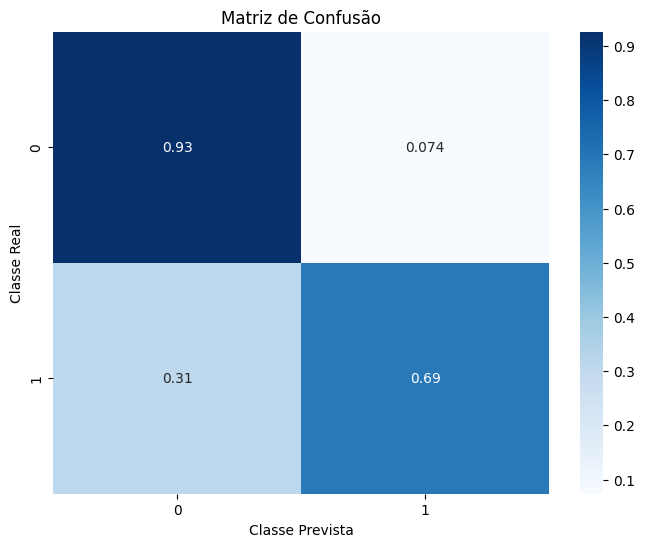

In [ ]:
conf = confusion_matrix(y_test,y_pred_test, normalize = 'true')
plot_confusion_matrix(conf)

## Deadline

Thursday, May 2, 11:59 pm.

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- May 3, 11:59 pm : grade * 0.75
- May 4, 11:59 pm : grade * 0.5
- May 5, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English) or Google Colaboratory link (remember to share it!).

**This activity is NOT individual, it must be done in pairs (two-person group).**

Only one individual should deliver the notebook.